In [1]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(phyloseq)
library(ANCOMBC)
library("tidyverse")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.0.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.7     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/tableV_BacArc_merge_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/taxaVsearch_rep_merge_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 80037 rows [1, 2, 10, 13, 16, 19, 21, 24, 27, 29, 30, 38, 40, 41, 42, 44, 46, 48, 52, 54, ...].”


In [3]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151862 taxa and 2003 samples ]
sample_data() Sample Data:       [ 2003 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 151862 taxa by 8 taxonomic ranks ]

In [6]:


ps =subset_samples(physeq_16S, sample_type == "TissueSlurry" | sample_type == "Mucus" | sample_type == "TissueSlurry_Skleton" |
                        sample_type=="Seawater" | sample_type=="Sediment")
ps 


ps_CNAT =subset_samples(physeq_16S, species_code=="CNAT")
ps_CNAT

ps_DLAB =subset_samples(physeq_16S, species_code=="DLAB")
ps_DLAB

ps_DSTO =subset_samples(physeq_16S, species_code=="DSTO")
ps_DSTO


ps_MCAV =subset_samples(physeq_16S, species_code=="MCAV")
ps_MCAV


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151862 taxa and 1948 samples ]
sample_data() Sample Data:       [ 1948 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 151862 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151862 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 151862 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151862 taxa and 105 samples ]
sample_data() Sample Data:       [ 105 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 151862 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151862 taxa and 51 samples ]
sample_data() Sample Data:       [ 51 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 151862 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151862 taxa and 563 samples ]
sample_data() Sample Data:       [ 563 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 151862 taxa by 8 taxonomic ranks ]

In [10]:
ps_CNAT_fill = filter_taxa(ps_CNAT, function(x) sum(x > 5) > (0.030*length(x)), TRUE)
ps_CNAT_fill
                           
ps_DLAB_fill = filter_taxa(ps_DLAB, function(x) sum(x > 5) > (0.030*length(x)), TRUE)
ps_DLAB_fill  

                           
ps_DSTO_fill = filter_taxa(ps_DSTO, function(x) sum(x > 5) > (0.030*length(x)), TRUE)
ps_DSTO_fill

ps_MCAV_fill = filter_taxa(ps_MCAV, function(x) sum(x > 5) > (0.030*length(x)), TRUE)
ps_MCAV_fill                           

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1365 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 1365 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1848 taxa and 105 samples ]
sample_data() Sample Data:       [ 105 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 1848 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4067 taxa and 51 samples ]
sample_data() Sample Data:       [ 51 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 4067 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1743 taxa and 563 samples ]
sample_data() Sample Data:       [ 563 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 1743 taxa by 8 taxonomic ranks ]

In [11]:
out = ancombc(phyloseq = ps_CNAT_fill, formula = "tissue_type", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="tissue_type" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global

In [37]:
#extract W statistic (standardized effect size)
res_df = data.frame(res$W, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID") %>%
mutate(group = ifelse(tissue_typeDL > 0, "DL", "AH")) 
head(res_df)

# Retain only significant values (alpha set to 0.01)
sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Significant=tissue_typeDL)  %>%
mutate(Host="CNAT") # add host label

head(sigs)
dim(sigs)

#combine significant ASVs with their effect sizr
sig_effect_df = res_df %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")

sig_effect_df

,Feature.ID,tissue_typeDL,tissue_typeDU,group
,<chr>,<dbl>,<dbl>,<chr>
1,912b4ccac259cdefe5f88e44ea5009cf,-3.6252297,-2.3848637,AH
2,d4a3caec111662cdcbc0297a92f93891,-0.2112093,-1.5305790,AH
3,a0c96e28533d6037db42fbbe4599d136,1.8588739,3.5555483,DL
4,073717eb84cbdfcbcd81ae4e22a75056,-1.5261247,-0.4000595,AH
5,c56a2635e1245823ea50b8d8dca33e37,-0.3004698,-4.9172274,AH
6,58fa526ac084288669c23ebfe74a9ece,-0.7256422,-4.6830472,AH


,Feature.ID,Significant,Host
,<chr>,<lgl>,<chr>
1,912b4ccac259cdefe5f88e44ea5009cf,TRUE,CNAT
2,c56a2635e1245823ea50b8d8dca33e37,TRUE,CNAT
3,1cb1c8f17dadfadb730bc00cc2726325,TRUE,CNAT
4,2c02380cd449ee4e9e3bdc7c18e9265c,TRUE,CNAT
5,4c41969f0e920c8ddd1f30b249d1259d,TRUE,CNAT
6,36f66ecaa952d96ce8f550bb7b337753,TRUE,CNAT


[1] 188   3

Feature.ID,tissue_typeDL,tissue_typeDU,group,Kingdom,Phylum,Class,Order,Family,Genus,Species,Consensus,Significant,Host
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>
912b4ccac259cdefe5f88e44ea5009cf,-3.6252297,-2.38486374,AH,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,NA,NA,1.0000000,TRUE,CNAT
c56a2635e1245823ea50b8d8dca33e37,-0.3004698,-4.91722743,AH,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Pseudophaeobacter,NA,0.6666667,TRUE,CNAT
1cb1c8f17dadfadb730bc00cc2726325,0.1914228,0.72313495,DL,d__Archaea,p__Thermoplasmatota,c__Thermoplasmata,o__Thermoplasmata,f__Thermoplasmata,g__Marine_Group_III,s__uncultured_marine,0.6666667,TRUE,CNAT
2c02380cd449ee4e9e3bdc7c18e9265c,-0.2666934,3.11004174,AH,d__Bacteria,p__Bacteroidota,c__Rhodothermia,o__Balneolales,f__Balneolaceae,g__Balneola,s__uncultured_bacterium,0.6666667,TRUE,CNAT
4c41969f0e920c8ddd1f30b249d1259d,0.7240046,2.65528755,DL,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,f__Cyanobiaceae,g__Synechococcus_CC9902,s__uncultured_bacterium,0.6666667,TRUE,CNAT
36f66ecaa952d96ce8f550bb7b337753,1.7054670,3.58887933,DL,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__OM182_clade,f__OM182_clade,g__OM182_clade,s__uncultured_bacterium,0.6666667,TRUE,CNAT
158120ea76770df8c20282ebd680abd7,-0.4850482,1.40899490,AH,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__NS9_marine_group,g__NS9_marine_group,s__uncultured_bacterium,1.0000000,TRUE,CNAT
b90bda30273c7ac4c1a7418bb51bf10c,0.8058174,2.91539762,DL,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__MWH-UniP1_aquatic_group,g__MWH-UniP1_aquatic_group,s__uncultured_bacterium,0.6666667,TRUE,CNAT
fec57e2b473f6e22ebe7f3d9884edcac,1.0650697,3.50884568,DL,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__NS7_marine_group,g__NS7_marine_group,s__uncultured_bacterium,0.6666667,TRUE,CNAT


In [40]:
out = ancombc(phyloseq = ps_DLAB_fill, formula = "tissue_type", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="tissue_type" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global



#extract W statistic (standardized effect size)
res_df = data.frame(res$W, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID") %>%
mutate(group = ifelse(tissue_typeDL > 0, "DL", "AH")) 
head(res_df)

# Retain only significant values (alpha set to 0.01)
sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Significant=tissue_typeDL)  %>%
mutate(Host="DLAB") # add host label

head(sigs)
dim(sigs)

#combine significant ASVs with their effect sizr
sig_effect_df = res_df %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")

sig_effect_df

,Feature.ID,tissue_typeDL,tissue_typeDU,group
,<chr>,<dbl>,<dbl>,<chr>
1,9c338ba1c02b5860059abf50eb3bcaa3,-0.8824408,-2.4516282,AH
2,69a380c71d50e46b4ee3d155c74352a5,-0.3278607,0.6035175,AH
3,912b4ccac259cdefe5f88e44ea5009cf,-2.6520808,-2.2441117,AH
4,b4cbd2f187e936f9da772b31bc465ecf,-2.4661375,4.4421864,AH
5,d4a3caec111662cdcbc0297a92f93891,-0.5983995,0.8129723,AH
6,87fc6fa49b4e35a15831777056f814d4,1.4185135,-1.0166047,DL


,Feature.ID,Significant,Host
,<chr>,<lgl>,<chr>
1,9c338ba1c02b5860059abf50eb3bcaa3,TRUE,DLAB
2,912b4ccac259cdefe5f88e44ea5009cf,TRUE,DLAB
3,87fc6fa49b4e35a15831777056f814d4,TRUE,DLAB
4,c56a2635e1245823ea50b8d8dca33e37,TRUE,DLAB
5,58fa526ac084288669c23ebfe74a9ece,TRUE,DLAB
6,1dd91737eee1a76df2dcd1e570b556b4,TRUE,DLAB


[1] 163   3

Feature.ID,tissue_typeDL,tissue_typeDU,group,Kingdom,Phylum,Class,Order,Family,Genus,Species,Consensus,Significant,Host
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>
9c338ba1c02b5860059abf50eb3bcaa3,-0.88244082,-2.4516282,AH,d__Archaea,p__Crenarchaeota,c__Nitrososphaeria,o__Nitrosopumilales,f__Nitrosopumilaceae,g__Candidatus_Nitrosopumilus,s__uncultured_archaeon,0.6666667,TRUE,DLAB
912b4ccac259cdefe5f88e44ea5009cf,-2.65208083,-2.2441117,AH,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,NA,NA,1.0000000,TRUE,DLAB
87fc6fa49b4e35a15831777056f814d4,1.41851350,-1.0166047,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,f__DEV007,g__DEV007,s__uncultured_bacterium,0.6666667,TRUE,DLAB
c56a2635e1245823ea50b8d8dca33e37,0.57842735,-1.4433963,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Pseudophaeobacter,NA,0.6666667,TRUE,DLAB
58fa526ac084288669c23ebfe74a9ece,-0.28225338,-4.4299412,AH,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Ruegeria,s__Ruegeria_sp.,0.6666667,TRUE,DLAB
1dd91737eee1a76df2dcd1e570b556b4,-3.96632507,2.0419271,AH,d__Bacteria,p__Bacteroidota,c__Rhodothermia,o__Balneolales,f__Balneolaceae,g__Balneola,s__uncultured_bacterium,0.6666667,TRUE,DLAB
1b86f049105a2ed814c03799bdbefc81,2.52208072,-0.6851575,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Parvularculaceae,g__Parvularcula,s__Parvularculaceae_bacterium,0.6666667,TRUE,DLAB
45397fc200b1b4bcbabb514850b39007,1.30036081,-2.1306355,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Cohaesibacter,s__marine_metagenome,0.6666667,TRUE,DLAB
d9834ebd2dc1b3136b43233ee7f324aa,-2.50906363,-4.5915926,AH,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Ga0077536,f__Ga0077536,g__Ga0077536,s__uncultured_bacterium,1.0000000,TRUE,DLAB


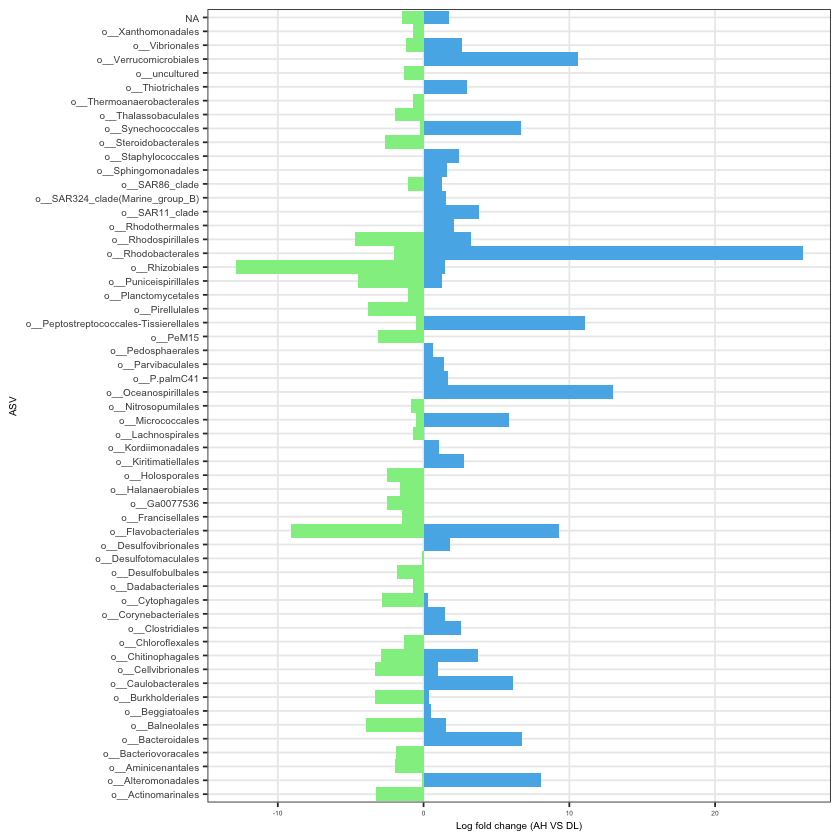

In [41]:
t_fig = ggplot(data = sig_effect_df, 
           aes(x = tissue_typeDL, y = Order, fill=group)
              ) + 
  geom_bar(stat = "identity", width = 1) +
           #, position = position_(width = 0.3)) +
  theme_bw() + 
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
  
#geom_errorbar(aes(xmin = tissue_typeDL - tissue_typeDLSD, xmax = tissue_typeDL + tissue_typeDLSD),
 #               width = 0.2,
  #              position = position_dodge(0.03), color = "#999999", alpha=0.5) + 
scale_fill_manual(values=c("lightgreen","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588",
                          "#D1A33D","#56B4E9","yellow2","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588")) +
  labs(y = "ASV", x = "Log fold change (AH VS DL)") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.y = element_text(size =6)) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.x = element_text(size =8)) +
#theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.8, , keyheight =.70, ncol=1))

t_fig

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/tissue_type.png",
        width = 5, height = 5, units = "in", dpi=250)

In [42]:
out = ancombc(phyloseq = ps_DSTO_fill, formula = "tissue_type", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="tissue_type" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global



#extract W statistic (standardized effect size)
res_df = data.frame(res$W, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID") %>%
mutate(group = ifelse(tissue_typeDL > 0, "DL", "AH")) 
head(res_df)

# Retain only significant values (alpha set to 0.01)
sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Significant=tissue_typeDL)  %>%
mutate(Host="DSTO") # add host label

head(sigs)
dim(sigs)

#combine significant ASVs with their effect sizr
sig_effect_df = res_df %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")

sig_effect_df

,Feature.ID,tissue_typeDL,tissue_typeDU,group
,<chr>,<dbl>,<dbl>,<chr>
1,865ff518858d2b389d6296e3a3843cf7,-0.29234568,-1.9392014,AH
2,91e0ccac1af509234fa1a76726446f6e,-0.24474406,-2.9383808,AH
3,69a380c71d50e46b4ee3d155c74352a5,-0.08309892,1.5008017,AH
4,b4cbd2f187e936f9da772b31bc465ecf,-2.48895547,3.8263168,AH
5,dc64af5448918d7cf4f866e64b876560,1.43846248,-2.2412169,DL
6,2d94092ced4d445222e135097b1abf92,0.70091663,0.1290794,DL


,Feature.ID,Significant,Host
,<chr>,<lgl>,<chr>
1,91e0ccac1af509234fa1a76726446f6e,TRUE,DSTO
2,dc64af5448918d7cf4f866e64b876560,TRUE,DSTO
3,87fc6fa49b4e35a15831777056f814d4,TRUE,DSTO
4,fca225821e0710e11620954252ae6bda,TRUE,DSTO
5,23c582bff7acabdbad7c82040f26bb7a,TRUE,DSTO
6,13822647f73c494da5a8356c2fae091d,TRUE,DSTO


[1] 272   3

Feature.ID,tissue_typeDL,tissue_typeDU,group,Kingdom,Phylum,Class,Order,Family,Genus,Species,Consensus,Significant,Host
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<chr>
91e0ccac1af509234fa1a76726446f6e,-0.24474406,-2.938381,AH,d__Bacteria,p__NB1-j,c__NB1-j,o__NB1-j,f__NB1-j,g__NB1-j,s__uncultured_bacterium,0.6666667,TRUE,DSTO
dc64af5448918d7cf4f866e64b876560,1.43846248,-2.241217,DL,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Shewanellaceae,g__Ferrimonas,NA,1.0000000,TRUE,DSTO
87fc6fa49b4e35a15831777056f814d4,0.98682879,-2.229537,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,f__DEV007,g__DEV007,s__uncultured_bacterium,0.6666667,TRUE,DSTO
fca225821e0710e11620954252ae6bda,2.02562733,-1.559094,DL,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Marinifilaceae,g__Marinifilum,s__uncultured_bacterium,1.0000000,TRUE,DSTO
23c582bff7acabdbad7c82040f26bb7a,0.30345949,-2.244801,DL,d__Bacteria,p__Desulfobacterota,c__Desulfobulbia,o__Desulfobulbales,f__Desulfobulbaceae,g__Desulfobulbus,s__uncultured_bacterium,0.7500000,TRUE,DSTO
13822647f73c494da5a8356c2fae091d,-1.99161092,-3.507780,AH,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Cyanobacteriales,f__Xenococcaceae,g__Xenococcus_PCC-7305,s__uncultured_bacterium,0.6666667,TRUE,DSTO
73e7c26fc8862af7d821ab6581bf722a,0.55309883,-1.995370,DL,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Cryomorphaceae,g__Owenweeksia,NA,1.0000000,TRUE,DSTO
f349b0e2349ec58ff08792ccd0db1e9e,0.08736425,-2.425868,DL,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Shewanellaceae,g__Ferrimonas,NA,1.0000000,TRUE,DSTO
bcbcf931322e10b4e3816d11ca95012e,0.55637040,-2.238617,DL,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Chitinophagales,f__Saprospiraceae,g__Lewinella,NA,1.0000000,TRUE,DSTO
